In [293]:
from datetime import timedelta
import pandas as pd
from pycaret.regression import *

In [294]:
df = pd.read_csv("gold_pre.csv")

In [295]:
df.columns

Index(['Unnamed: 0', 'Price', 'Close', 'Volume', 'year', 'month', 'day',
       'dayofweek', 'quarter', 'hour', 'Close_lag_1week', 'SMA_7',
       'Close_rolling_std_7', 'EMA_5', 'Close_rolling_max_7',
       'Close_rolling_min_7', 'Price_Change', 'Gain', 'Loss', 'Avg_Gain',
       'Avg_Loss', 'RS', 'RSI', 'EMA_1week', 'EMA_2week', 'MACD', 'Signal',
       'Histogram', 'Volume_Profit'],
      dtype='object')

In [296]:
last_date = df["Price"].max()
last_date = pd.to_datetime(last_date)
print(last_date)

2025-03-06 04:00:00+00:00


In [297]:
future_date = pd.date_range(start=last_date + timedelta(days=1), periods=9, freq="d")
future_date

DatetimeIndex(['2025-03-07 04:00:00+00:00', '2025-03-08 04:00:00+00:00',
               '2025-03-09 04:00:00+00:00', '2025-03-10 04:00:00+00:00',
               '2025-03-11 04:00:00+00:00', '2025-03-12 04:00:00+00:00',
               '2025-03-13 04:00:00+00:00', '2025-03-14 04:00:00+00:00',
               '2025-03-15 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [298]:
future_date = pd.DataFrame({"Price": future_date})
future_date.head()

,Price
0,2025-03-07 04:00:00+00:00
1,2025-03-08 04:00:00+00:00
2,2025-03-09 04:00:00+00:00
3,2025-03-10 04:00:00+00:00
4,2025-03-11 04:00:00+00:00


In [299]:
future_date['year'] = future_date['Price'].dt.year
future_date['month'] = future_date['Price'].dt.month
future_date['day'] = future_date['Price'].dt.day
future_date['dayofweek'] = future_date['Price'].dt.dayofweek
future_date['quarter'] = future_date['Price'].dt.quarter
future_date['hour'] = future_date['Price'].dt.hour
future_date

,Price,year,month,day,dayofweek,quarter,hour
0,2025-03-07 04:00:00+00:00,2025,3,7,4,1,4
1,2025-03-08 04:00:00+00:00,2025,3,8,5,1,4
2,2025-03-09 04:00:00+00:00,2025,3,9,6,1,4
3,2025-03-10 04:00:00+00:00,2025,3,10,0,1,4
4,2025-03-11 04:00:00+00:00,2025,3,11,1,1,4
5,2025-03-12 04:00:00+00:00,2025,3,12,2,1,4
6,2025-03-13 04:00:00+00:00,2025,3,13,3,1,4
7,2025-03-14 04:00:00+00:00,2025,3,14,4,1,4
8,2025-03-15 04:00:00+00:00,2025,3,15,5,1,4


In [300]:
df_pre = pd.concat([df,future_date], ignore_index=True)

In [301]:
df_pre['Close_lag_1week'] = df_pre['Close'].shift(192)
df_pre['Close_lag_1week'].tail(7)

10876    2950.000000
10877    2944.399902
10878    2941.699951
10879    2952.800049
10880    2954.699951
10881    2954.199951
10882    2949.399902
Name: Close_lag_1week, dtype: float64

In [302]:
df_pre['SMA_7'] = df_pre['Close'].shift(162).rolling(window=192).mean()
df_pre['Close_rolling_std_7'] = df_pre['Close'].shift(192).rolling(window=192).std()
df_pre['Close_rolling_std_7'].tail(7)

10876    19.019587
10877    19.000718
10878    18.970850
10879    18.998487
10880    19.027755
10881    19.059335
10882    19.075460
Name: Close_rolling_std_7, dtype: float64

In [303]:
df_pre['EMA_5'] = df_pre['Close'].ewm(span=5, adjust=False).mean()
df_pre['EMA_5'].tail(7)

10876    2929.43146
10877    2929.43146
10878    2929.43146
10879    2929.43146
10880    2929.43146
10881    2929.43146
10882    2929.43146
Name: EMA_5, dtype: float64

In [304]:
df_pre['Close_rolling_max_7'] = df_pre['Close'].shift(192).rolling(window=192).max()
df_pre['Close_rolling_min_7'] = df_pre['Close'].shift(192).rolling(window=192).min()
df_pre['Close_rolling_max_7'].tail(7)
df_pre['Close_rolling_min_7'].tail(7)

10876    2892.399902
10877    2892.399902
10878    2892.399902
10879    2892.399902
10880    2892.399902
10881    2892.399902
10882    2892.399902
Name: Close_rolling_min_7, dtype: float64

In [305]:
df_pre['Price_Change'] = df_pre['Close'].shift(168).diff()
df_pre['Price_Change'].tail(7)

10876   -0.800049
10877    0.400147
10878   -1.000000
10879   -8.300049
10880   -3.600098
10881    0.600098
10882   -2.199951
Name: Price_Change, dtype: float64

In [306]:
df_pre['Gain'] = df_pre['Price_Change'].where(df_pre['Price_Change'] > 0, 0)
df_pre['Loss'] = -df_pre['Price_Change'].where(df_pre['Price_Change'] < 0, 0)
df_pre['Gain'].tail(7)

10876    0.000000
10877    0.400147
10878    0.000000
10879    0.000000
10880    0.000000
10881    0.600098
10882    0.000000
Name: Gain, dtype: float64

In [307]:
df_pre['Avg_Gain'] = df_pre['Gain'].rolling(window=336).mean()
df_pre['Avg_Loss'] = df_pre['Loss'].rolling(window=336).mean()
df_pre['Avg_Gain'].tail(7)

10876    2.041962
10877    2.041664
10878    2.027379
10879    2.027379
10880    2.024700
10881    2.006546
10882    1.974106
Name: Avg_Gain, dtype: float64

In [308]:
df_pre['RS'] = df_pre['Avg_Gain'] / df_pre['Avg_Loss']
df_pre['RS'].tail(7)

10876    1.218650
10877    1.218473
10878    1.207802
10879    1.203321
10880    1.194137
10881    1.183430
10882    1.159819
Name: RS, dtype: float64

In [309]:
df_pre['RSI'] = 100 - (100 / (1 + df_pre['RS']))
df_pre['RSI'].tail(7)

10876    54.927548
10877    54.923945
10878    54.706084
10879    54.613974
10880    54.423998
10881    54.200502
10882    53.699815
Name: RSI, dtype: float64

In [310]:
df_pre['EMA_1week'] = df_pre['Close'].ewm(span=168, adjust=False).mean()
df_pre['EMA_2week'] = df_pre['Close'].ewm(span=336, adjust=False).mean()

# คำนวณ MACD Line
df_pre['MACD'] = df_pre['EMA_1week'] - df_pre['EMA_2week']

# คำนวณ Signal Line (9-period EMA ของ MACD Line)
df_pre['Signal'] = df_pre['MACD'].ewm(span=9, adjust=False).mean()

# คำนวณ MACD Histogram
df_pre['Histogram'] = df_pre['MACD'] - df_pre['Signal']

In [311]:
df_pre['Price_Change'] = df_pre['Close'].shift(168).diff()  # การคำนวณการเปลี่ยนแปลงของราคา
df_pre['Volume_Profit'] = df_pre['Volume'].shift(168) * df_pre['Price_Change']
df_pre.tail()

,Unnamed: 0,Price,Close,Volume,year,month,day,dayofweek,quarter,hour,...,Avg_Gain,Avg_Loss,RS,RSI,EMA_1week,EMA_2week,MACD,Signal,Histogram,Volume_Profit
10878,NaN,2025-03-11 04:00:00+00:00,NaN,NaN,2025,3,11,1,1,4,...,2.027379,1.678569,1.207802,54.706084,2915.109043,2911.522677,3.586367,3.495912,0.090454,-3451.000000
10879,NaN,2025-03-12 04:00:00+00:00,NaN,NaN,2025,3,12,2,1,4,...,2.027379,1.684820,1.203321,54.613974,2915.109043,2911.522677,3.586367,3.514003,0.072364,-39632.733975
10880,NaN,2025-03-13 04:00:00+00:00,NaN,NaN,2025,3,13,3,1,4,...,2.024700,1.695534,1.194137,54.423998,2915.109043,2911.522677,3.586367,3.528476,0.057891,-15361.618166
10881,NaN,2025-03-14 04:00:00+00:00,NaN,NaN,2025,3,14,4,1,4,...,2.006546,1.695534,1.183430,54.200502,2915.109043,2911.522677,3.586367,3.540054,0.046313,2131.548096
10882,NaN,2025-03-15 04:00:00+00:00,NaN,NaN,2025,3,15,5,1,4,...,1.974106,1.702082,1.159819,53.699815,2915.109043,2911.522677,3.586367,3.549317,0.037050,-9888.779745


In [312]:
df_pre = df_pre.drop(columns=(['Volume',"Close"]))

In [313]:
df_pre.set_index('Price', inplace=True)

In [314]:
df_pre = df_pre.tail(9)

In [324]:
lightgbm_model_gold = load_model('lightgbm_model_gold')

Transformation Pipeline and Model Successfully Loaded


In [325]:
predict = predict_model(lightgbm_model_gold,data=df_pre)
predict

,Unnamed: 0,year,month,day,dayofweek,quarter,hour,Close_lag_1week,SMA_7,Close_rolling_std_7,...,Avg_Loss,RS,RSI,EMA_1week,EMA_2week,MACD,Signal,Histogram,Volume_Profit,prediction_label
Price,,,,,,,,,,,,,,,,,,,,,
2025-03-07 04:00:00+00:00,NaN,2025,3,7,4,1,4,2948.399902,2942.937500,19.041201,...,1.680950,1.214766,54.848507,2915.109131,2911.522705,3.586367,3.365531,0.220836,8355.500000,2930.741300
2025-03-08 04:00:00+00:00,NaN,2025,3,8,5,1,4,2949.600098,2943.072998,19.055157,...,1.676188,1.218217,54.918758,2915.109131,2911.522705,3.586367,3.409698,0.176669,-0.000000,2930.360378
2025-03-09 04:00:00+00:00,NaN,2025,3,9,6,1,4,2950.000000,2943.223389,19.019587,...,1.675593,1.218650,54.927547,2915.109131,2911.522705,3.586367,3.445032,0.141335,-1373.684082,2930.478747
2025-03-10 04:00:00+00:00,NaN,2025,3,10,0,1,4,2944.399902,2943.332275,19.000717,...,1.675593,1.218473,54.923946,2915.109131,2911.522705,3.586367,3.473299,0.113068,1944.714478,2930.342545
2025-03-11 04:00:00+00:00,NaN,2025,3,11,1,1,4,2941.699951,2943.468750,18.970850,...,1.678569,1.207802,54.706085,2915.109131,2911.522705,3.586367,3.495912,0.090454,-3451.000000,2930.831869
2025-03-12 04:00:00+00:00,NaN,2025,3,12,2,1,4,2952.800049,2943.592285,18.998487,...,1.684820,1.203321,54.613976,2915.109131,2911.522705,3.586367,3.514003,0.072364,-39632.734375,2930.697667
2025-03-13 04:00:00+00:00,NaN,2025,3,13,3,1,4,2954.699951,2943.687988,19.027754,...,1.695534,1.194137,54.424000,2915.109131,2911.522705,3.586367,3.528476,0.057891,-15361.618164,2930.630808
2025-03-14 04:00:00+00:00,NaN,2025,3,14,4,1,4,2954.199951,2943.786377,19.059334,...,1.695534,1.183430,54.200500,2915.109131,2911.522705,3.586367,3.540054,0.046313,2131.548096,2931.710140
2025-03-15 04:00:00+00:00,NaN,2025,3,15,5,1,4,2949.399902,2943.814697,19.075460,...,1.702082,1.159819,53.699814,2915.109131,2911.522705,3.586367,3.549317,0.037050,-9888.779297,2931.548454


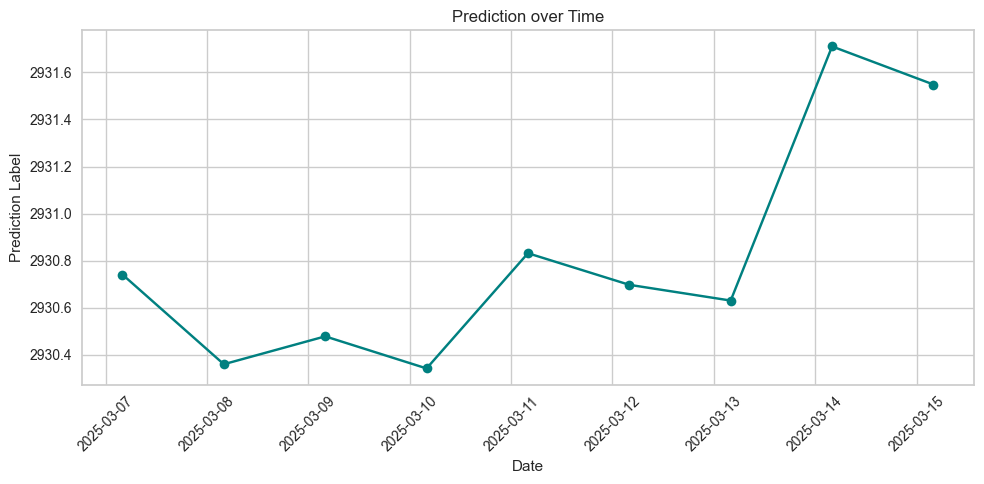

In [327]:
import matplotlib.pyplot as plt

# สมมุติว่าชุดข้อมูลของคุณชื่อว่า predict (ตามภาพที่ให้มา)
plt.figure(figsize=(10, 5))
plt.plot(predict.index, predict["prediction_label"], marker='o', linestyle='-', color='teal')

plt.title("Prediction over Time")
plt.xlabel("Date")
plt.ylabel("Prediction Label")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

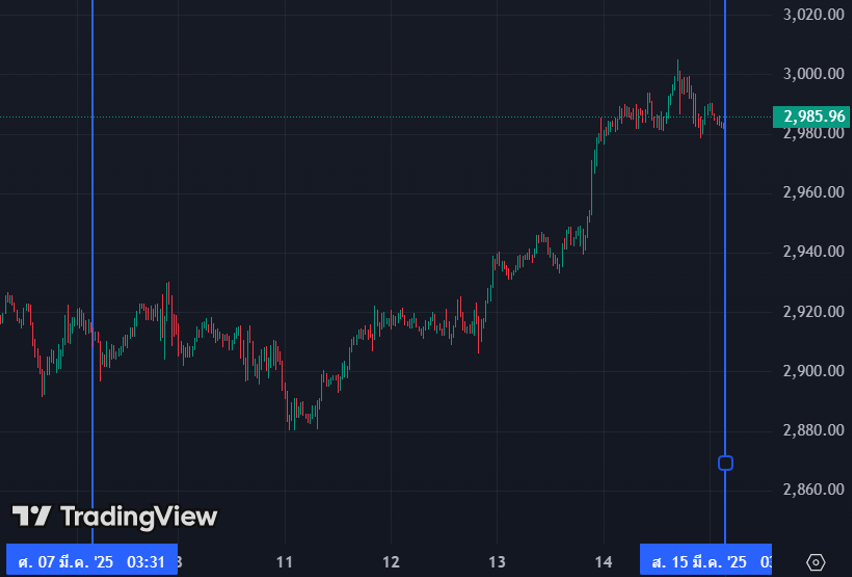

In [ ]:
from IPython.display import display, Image
# แสดงภาพ PNG
display(Image(filename="Screenshot 2025-03-16 164848-2.png"))
